In [7]:
# Import dependency
import pandas as pd
from pymongo import MongoClient
from pprint import pprint
import matplotlib.pyplot as plt

In [8]:
# Import Mongo keys
from mongo_access  import password

In [9]:
# Create an instance of MongoClient
mongo = MongoClient(password)

In [10]:
# Assign the database and collection to a variable name
db = mongo['books']
collection = db['books']

In [11]:
# retreive a random list of 10000 collections in our new database
data = collection.aggregate([{'$sample': {'size': 10000}}])

In [12]:
# Convert to Pandas DataFrame
df = pd.DataFrame(data)
df.head()

,_id,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,...,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series,genre,random
0,66e3626897403ebaddeb3546,1582462801,32,[],US,,"[{'count': '65', 'name': 'to-read'}, {'count':...",,false,3.96,...,2009,https://www.goodreads.com/book/show/6745919-sk...,https://images.gr-assets.com/books/1320431816m...,6745919,73,6942316,Sky High: The True Story of Maggie Gee,Sky High: The True Story of Maggie Gee,children,143
1,66e3626c97403ebaddeb3e03,0990317811,9,[],US,,"[{'count': '306', 'name': 'to-read'}, {'count'...",,false,4.56,...,2014,https://www.goodreads.com/book/show/23151310-t...,https://images.gr-assets.com/books/1409794715m...,23151310,14,42698967,The Magic of Friendship: - Mom's Choice Awards...,The Magic of Friendship: - Mom's Choice Awards...,children,938
2,66e3626597403ebaddeb2ec5,0679830529,7,[],US,,"[{'count': '36', 'name': 'to-read'}, {'count':...",,false,3.87,...,1992,https://www.goodreads.com/book/show/682322.The...,https://s.gr-assets.com/assets/nophoto/book/11...,682322,52,1594438,The Mystery of Pony Hollow,The Mystery of Pony Hollow,children,551
3,66e3626197403ebaddeb2653,0141324902,94,[163024],US,en-US,"[{'count': '113290', 'name': 'to-read'}, {'cou...",,false,3.96,...,2007,https://www.goodreads.com/book/show/2975870-di...,https://images.gr-assets.com/books/1379284477m...,2975870,772,2617009,"Diary of a Wimpy Kid (Diary of a Wimpy Kid, #1)","Diary of a Wimpy Kid (Diary of a Wimpy Kid, #1)",children,757
4,66e3626297403ebaddeb2952,0316200735,8,[],US,,"[{'count': '29', 'name': 'to-read'}, {'count':...",,false,3.90,...,2012,https://www.goodreads.com/book/show/13526159-i...,https://s.gr-assets.com/assets/nophoto/book/11...,13526159,59,19086866,"I Say, You Say Animal Sounds!","I Say, You Say Animal Sounds!",children,195


In [7]:
# Drop columns not needed for analysis
df_clean = df.drop(columns=['_id', 'text_reviews_count', 'series', 'country_code', 'language_code', 'url', 'image_url', 
                 'book_id', 'work_id', 'title_without_series', 'random', 'asin', 'kindle_asin',	'similar_books', 'description',
                 'link', 'publisher', 'isbn', 'edition_information', 'authors'])
df_clean.head()

,popular_shelves,is_ebook,average_rating,format,num_pages,publication_day,isbn13,publication_month,publication_year,ratings_count,title,genre
0,"[{'count': '151', 'name': 'to-read'}, {'count'...",true,3.76,ebook,113,1,9781771113311,10,2012,577,Catching A Bit Of Irish (Wolves of Stone Ridge...,romance
1,"[{'count': '582', 'name': 'to-read'}, {'count'...",false,3.70,Paperback,272,22,9780061283970,4,2008,1184,"Something Reckless (Albright Sisters, #2)",history_biography
2,"[{'count': '421', 'name': 'to-read'}, {'count'...",false,4.01,Paperback,240,9,9781606843901,10,2012,119,The Secret of the Skeleton Key (The Code Buste...,children
3,"[{'count': '16', 'name': 'to-read'}, {'count':...",true,3.67,,,,,,,3,Midnight Ruling (The Demon's Grave #2),fantasy_paranormal
4,"[{'count': '849', 'name': 'to-read'}, {'count'...",false,3.72,Paperback,187,,9780373111671,5,1989,34,The Veranchetti Marriage,romance


In [8]:
df_clean = df_clean[['title', 'genre', 'average_rating', 'num_pages', 'publication_day', 'publication_month', 
                     'publication_year', 'format', 'is_ebook', 'ratings_count', 'popular_shelves', 'isbn13']]
df_clean.head()

,title,genre,average_rating,num_pages,publication_day,publication_month,publication_year,format,is_ebook,ratings_count,popular_shelves,isbn13
0,Catching A Bit Of Irish (Wolves of Stone Ridge...,romance,3.76,113,1,10,2012,ebook,true,577,"[{'count': '151', 'name': 'to-read'}, {'count'...",9781771113311
1,"Something Reckless (Albright Sisters, #2)",history_biography,3.70,272,22,4,2008,Paperback,false,1184,"[{'count': '582', 'name': 'to-read'}, {'count'...",9780061283970
2,The Secret of the Skeleton Key (The Code Buste...,children,4.01,240,9,10,2012,Paperback,false,119,"[{'count': '421', 'name': 'to-read'}, {'count'...",9781606843901
3,Midnight Ruling (The Demon's Grave #2),fantasy_paranormal,3.67,,,,,,true,3,"[{'count': '16', 'name': 'to-read'}, {'count':...",
4,The Veranchetti Marriage,romance,3.72,187,,5,1989,Paperback,false,34,"[{'count': '849', 'name': 'to-read'}, {'count'...",9780373111671


In [9]:
print(df_clean.isnull().sum())

title                0
genre                0
average_rating       0
num_pages            0
publication_day      0
publication_month    0
publication_year     0
format               0
is_ebook             0
ratings_count        0
popular_shelves      0
isbn13               0
dtype: int64


In [10]:
df_clean.describe()

,title,genre,average_rating,num_pages,publication_day,publication_month,publication_year,format,is_ebook,ratings_count,popular_shelves,isbn13
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,9889,8,245,727,32,13,93,56,2,1328,9844,6678
top,Wuthering Heights,romance,4.00,,,,,Paperback,false,2,"[{'count': '24811', 'name': 'classics'}, {'cou...",
freq,5,2394,196,3088,3802,3214,2382,3444,6646,300,6,3317


In [11]:
#Convert strings to floats

df_clean['average_rating'] = df['average_rating'].astype('float64')
df_clean['num_pages'] = df_clean['publication_month'].replace(r'^\s*$', None, regex=True)
df_clean['num_pages'] = pd.to_numeric(df_clean['num_pages'], errors='coerce')
df_clean['publication_month'] = df_clean['publication_month'].replace(r'^\s*$', None, regex=True)
df_clean['publication_month'] = pd.to_numeric(df_clean['publication_year'], errors='coerce')
df_clean['publication_year'] = df_clean['publication_year'].replace(r'^\s*$', None, regex=True)
df_clean['publication_year'] = pd.to_numeric(df_clean['publication_year'], errors='coerce')
df_clean['publication_day'] = df_clean['publication_year'].replace(r'^\s*$', None, regex=True)
df_clean['publication_day'] = pd.to_numeric(df_clean['publication_year'], errors='coerce')

In [12]:
# Create a visual that shows average rating by genre over time

# Separate the data by decade
twenty_teens = df_clean[(df_clean["publication_year"] > 2009)& (df_clean["publication_year"] < 2018)]
twenty_aughts = df_clean[(df_clean["publication_year"] > 1999)& (df_clean["publication_year"] < 2010)]
nineties = df_clean[(df_clean["publication_year"] > 1989)& (df_clean["publication_year"] < 2000)]
eighties = df_clean[(df_clean["publication_year"] > 1979)& (df_clean["publication_year"] < 1990)]
seventies = df_clean[(df_clean["publication_year"] > 1969)& (df_clean["publication_year"] < 1980)]
sixties = df_clean[(df_clean["publication_year"] > 1959)& (df_clean["publication_year"] < 1970)]
fifties = df_clean[(df_clean["publication_year"] > 1949)& (df_clean["publication_year"] < 1960)]
fourties = df_clean[(df_clean["publication_year"] > 1939)& (df_clean["publication_year"] < 1950)]
thirties = df_clean[(df_clean["publication_year"] > 1929)& (df_clean["publication_year"] < 1940)]
twenties = df_clean[(df_clean["publication_year"] > 1919)& (df_clean["publication_year"] < 1930)]
tens = df_clean[(df_clean["publication_year"] > 1909)& (df_clean["publication_year"] < 1920)]
aughts = df_clean[(df_clean["publication_year"] > 1899)& (df_clean["publication_year"] < 1910)]

# Group by 'genre` and take the mean of the `average_rating` per book for each decade.
twenty_teens_ratings = twenty_teens.groupby('genre')['average_rating'].mean()
twenty_aughts_ratings = twenty_aughts.groupby('genre')['average_rating'].mean()
nineties_ratings = nineties.groupby('genre')['average_rating'].mean()
eighties_ratings = eighties.groupby('genre')['average_rating'].mean()
seventies_ratings = seventies.groupby('genre')['average_rating'].mean()
sixties_ratings = sixties.groupby('genre')['average_rating'].mean()
fifties_ratings = fifties.groupby('genre')['average_rating'].mean()
fourties_ratings = fourties.groupby('genre')['average_rating'].mean()
thirties_ratings = thirties.groupby('genre')['average_rating'].mean()
twenties_ratings = twenties.groupby('genre')['average_rating'].mean()
tens_ratings = tens.groupby('genre')['average_rating'].mean()
aughts_ratings = aughts.groupby('genre')['average_rating'].mean()

# Combine each of the average ratings above into single DataFrame called `genre_ratings_by_decade`
genre_ratings_by_decade = pd.DataFrame({"2010's": twenty_teens_ratings, 
                                     "2000's": twenty_aughts_ratings,
                                     "1990's": nineties_ratings,
                                     "1980's": eighties_ratings,
                                     "1970's": seventies_ratings,
                                     "1960's": sixties_ratings,
                                     "1950's": fifties_ratings,
                                     "1940's": fourties_ratings,
                                     "1930's": thirties_ratings,
                                     "1920's": twenties_ratings,
                                     "1910's": tens_ratings,
                                     "1900's": aughts_ratings                                      
                                       })

# Minor data wrangling
genre_ratings_by_decade.index.name = None

# Display the DataFrame
genre_ratings_by_decade

,2010's,2000's,1990's,1980's,1970's,1960's,1950's,1940's,1930's,1920's,1910's,1900's
children,3.964523,3.850194,3.874948,3.867857,3.981538,3.963750,4.087500,3.9600,3.320,4.330,NaN,NaN
comics_graphic,3.926170,3.875897,3.920000,4.025000,4.115000,NaN,3.750000,NaN,NaN,NaN,NaN,NaN
fantasy_paranormal,3.941587,3.882448,3.855806,3.859167,3.923333,3.742500,4.070000,4.1000,4.330,3.685,NaN,NaN
history_biography,3.882559,3.837371,3.889071,3.915833,3.839259,3.964286,3.803333,3.8125,3.375,4.035,NaN,NaN
mystery_thriller_crime,3.839200,3.810531,3.778435,3.777059,3.758261,3.697647,3.627143,3.8540,3.828,3.470,NaN,NaN
poetry,4.171200,4.018730,4.096571,4.022143,3.762857,3.902222,4.055000,4.0600,NaN,NaN,NaN,NaN
romance,3.891613,3.769233,3.673710,3.450400,3.673333,3.735000,3.730000,3.7200,NaN,NaN,3.33,NaN
young_adult,NaN,NaN,NaN,3.470000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#data exists mainly for the last 50 years, drop 1900's-1960's
genre_ratings_by_decade_last_fifty = genre_ratings_by_decade.drop(columns=["1960's", "1950's", "1940's", "1930's", "1920's", "1910's", "1900's"])

#reorder so in increasing order chronologically after transposed
genre_ratings_by_decade_last_fifty = genre_ratings_by_decade_last_fifty[["1970's", "1980's", "1990's", "2000's", "2010's"]]

#transpose columns and rows so x and y axes are plotted accurately in next cell
genre_transposed = genre_ratings_by_decade_last_fifty.transpose()

,children,comics_graphic,fantasy_paranormal,history_biography,mystery_thriller_crime,poetry,romance,young_adult
1970's,3.981538,4.115000,3.923333,3.839259,3.758261,3.762857,3.673333,NaN
1980's,3.867857,4.025000,3.859167,3.915833,3.777059,4.022143,3.450400,3.47
1990's,3.874948,3.920000,3.855806,3.889071,3.778435,4.096571,3.673710,NaN
2000's,3.850194,3.875897,3.882448,3.837371,3.810531,4.018730,3.769233,NaN
2010's,3.964523,3.926170,3.941587,3.882559,3.839200,4.171200,3.891613,NaN


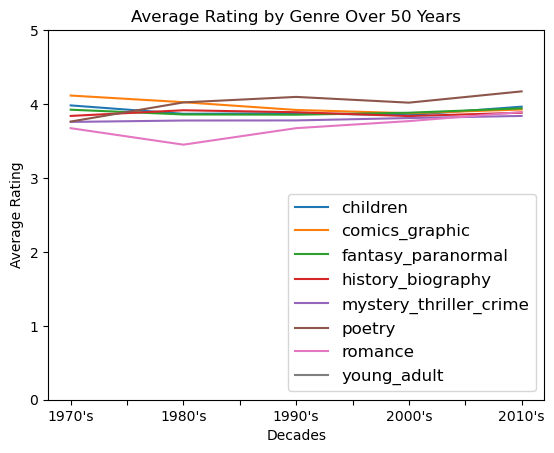

In [96]:
genre_transposed.plot()
plt.title("Average Rating by Genre Over 50 Years")
plt.xlabel("Decades")
plt.ylabel("Average Rating")
plt.ylim(0,5)
plt.legend(fontsize = 12, loc='lower right')
plt.show()

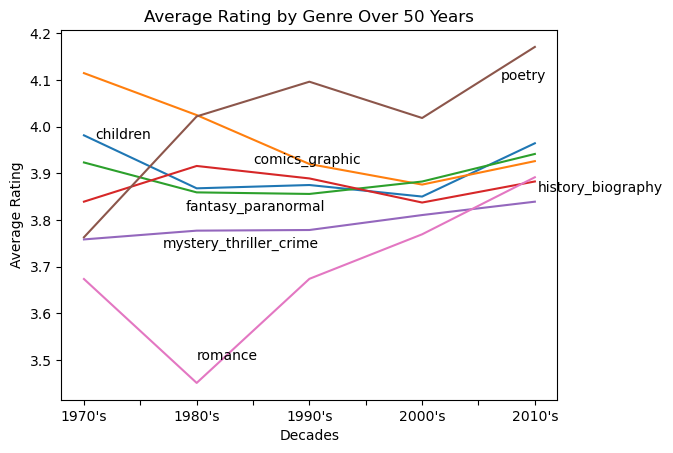

In [95]:
genre_transposed.plot(legend=False)
plt.title("Average Rating by Genre Over 50 Years")
plt.xlabel("Decades")
plt.ylabel("Average Rating")
plt.text(3.7, 4.1, 'poetry')
plt.text(0.1, 3.975, 'children')
plt.text(0.9, 3.82, 'fantasy_paranormal')
plt.text(1.5, 3.92, 'comics_graphic')
plt.text(1, 3.5, 'romance')
plt.text(4.03, 3.86, 'history_biography')
plt.text(0.7, 3.74, 'mystery_thriller_crime')
plt.show()